In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
from PIL import Image
from IPython.display import display
import warnings
from sklearn.preprocessing import normalize
warnings.filterwarnings('ignore')

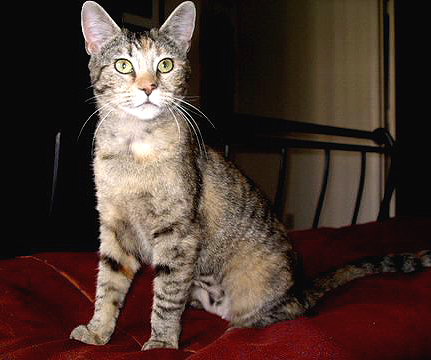

(431, 360) 3


In [3]:
##checking images
with Image.open("../CATS_DOGS/CAT/10000.jpg") as check:
    display(check)
    print(check.size,len(check.mode))

In [13]:
path="../CATS_DOGS/"

image_list=[]

for folder, subfolder, files in os.walk(path):
    for file in files:
        image_list.append(folder+"/"+file)

        


In [14]:
print(len(image_list))

24994


In [15]:
image_sizes=[]
rejected=[]
selected_images=[]
for item in image_list:
    try:
        with Image.open(item) as im:
           
            
            if (im.size[0]>=323 and im.size[1]>=302 and len(im.mode)==3):
                selected_images.append(item)
                image_sizes.append(im.size)
                
                
    except:
        rejected.append(im)
        
    

In [17]:
print(pd.DataFrame(image_sizes).describe())

                  0             1
count  16898.000000  16898.000000
mean     463.686235    405.429696
std       55.085726     59.064461
min      323.000000    302.000000
25%      430.000000    375.000000
50%      500.000000    375.000000
75%      500.000000    465.000000
max      500.000000    500.000000


In [18]:
transform=transforms.Compose([transforms.CenterCrop(224)])

In [23]:
for item in selected_images:
    
    gt=Image.open(item)

    gt=np.array(transform(gt))


    gt1=Image.fromarray(gt)
    gt1.save("../catdogData/gt/"+os.path.basename(item))
    noisy=gt+np.random.normal(0,40,(224,224,3))

    noisy=np.clip(noisy,0,255).astype(np.uint8)

    noisy=Image.fromarray(noisy)
    noisy.save("../catdogData/noise/"+os.path.basename(item))


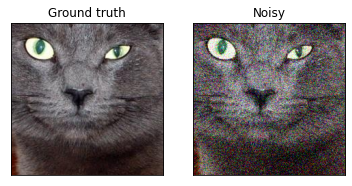

In [32]:
fig, ax=plt.subplots(1,2)

ax[0].imshow(gt)
ax[1].imshow(noisy)

ax[1].set_title("Noisy")
ax[0].set_title("Ground truth")

for a in ax:
    a.set_xticks([])
    a.set_yticks([])